In [331]:

import pandas as pd
import  numpy as np
import math
from numpy.linalg import inv

train  = pd.read_csv("train.csv",encoding="big5" ,header=None)
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
train_unmodify = []
index=10
train_mean=0
train_mean_num=0
for i in range (12):
    train_unmodify.append([])
    for k in range (20):
        for j in range (3,27):
            if(float(train[j][index])>0 and float(train[j][index])<300):
                train_mean+=float(train[j][index])
                train_mean_num+=1
            train_unmodify[i].append(float(train[j][index]))
        index+=18
train_mean/=train_mean_num
############train data set modify 移除過於大或過小的資料
train_modify =[]
for i in range (12):
    train_modify.append([])
    for k in range (480):
        if(train_unmodify[i][k]>0 and  train_unmodify[i][k]<300):
            train_modify[i].append(train_unmodify[i][k])
        else:
            train_modify[i].append(train_mean)

            

############ train data set 1 連續九小時當data 不重疊
train_feat=[]
train_label=[]
for i in range (12):
    index=0
    while(index<len(train_unmodify[i])):
        temp_mean=0
        for j in range (9):
            temp_mean+=train_unmodify[i][index]
            index+=1
        temp_mean/=9
        train_feat.append(temp_mean)
        train_label.append(train_unmodify[i][index])
        index+=1
print("tf_1: ",len(train_feat),", tl_1: ",(len(train_label)))
############ train data set 2 連續九小時當資料 重疊
train_feat_2=[]
train_label_2=[]
for i in range (12):
    index=0
    for j in range (471):
        temp_mean=0
        for k in range (j,j+9):
            temp_mean+=train_unmodify[i][k]
        temp_mean/=9.0
        train_feat_2.append(temp_mean)
        train_label_2.append(train_unmodify[i][j+9])
print("tf_2: ",len(train_feat_2),", tl_2: ",(len(train_label_2)))

###########train data set 1_m 使用修過的資料
train_feat_m=[]
train_label_m=[]

for i in range (12):
    index=0
    while(index<len(train_modify[i])):
        temp_mean=0
        for j in range (9):
            temp_mean+=train_modify[i][index]
            index+=1
        temp_mean/=9
        train_feat_m.append(temp_mean)
        train_label_m.append(train_modify[i][index])
        index+=1
print("tf_1_m: ",len(train_feat_m),", tl_1_m: ",(len(train_label_m)))

############ train data set 2_m 連續九小時當資料 重疊 使用modify的資料
train_feat_2_m=[]
train_label_2_m=[]
for i in range (12):
    index=0
    for j in range (471):
        temp_mean=0
        for k in range (j,j+9):
            temp_mean+=train_modify[i][k]
        temp_mean/=9.0
        train_feat_2_m.append(temp_mean)
        train_label_2_m.append(train_modify[i][j+9])
print("tf_2_m: ",len(train_feat_2_m),", tl_2_m: ",(len(train_label_2_m)))
############ train data set 3_m 連續5小時當資料 重疊 使用modify的資料
train_feat_3_m=[]
train_label_3_m=[]
x=1
for i in range (12):
    index=0
    for j in range (480-x):
        temp_mean=0
        for k in range (j,j+x):
            temp_mean+=train_modify[i][k]
        temp_mean/=x
        train_feat_3_m.append(temp_mean)
        train_label_3_m.append(train_modify[i][j+x])
print("tf_3_m: ",len(train_feat_3_m),", tl_3_m: ",(len(train_label_3_m)))

tf_1:  576 , tl_1:  576
tf_2:  5652 , tl_2:  5652
tf_1_m:  576 , tl_1_m:  576
tf_2_m:  5652 , tl_2_m:  5652
tf_3_m:  5748 , tl_3_m:  5748


In [310]:
tf=train_feat_3_m
tl=train_label_3_m

1 2 3 4 5 6 7 8 9 10 7.809680388574627 0.9861811549129259 2.999266677444085 7.320271026288339


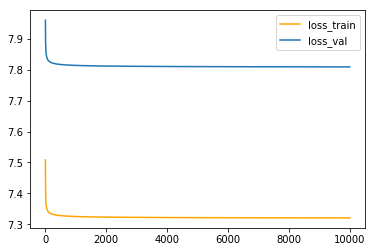

In [328]:
import matplotlib.pyplot as plt


loss_list=[]
validation_list=[]
num=len(tl)*9//10
(l,w,b,lw,lb)=(0,1, 3,1e-8,1e-8)
iteration=1
ada=0
for i in range (10000):
    if(iteration%1000==0):
        print(iteration//1000,end=" ")
    iteration+=1
    ls=0
    w_total=0
    b_total=0
    times=0
    for j in range(1):
        (l,w,b,lw,lb,loss_square)=gd(w,b,lw,lb)
        w_total+=w
        b_total+=b
        ls+=loss_square
        times+=1
    w_total/=times
    b_total/=times
    ls/=times
    w=w_total
    b=b_total
    validation_list.append(validation (w,b))
    loss_list.append(ls)
    if(iteration >10 and loss_list[len(loss_list)-2]-loss_list[len(loss_list)-1]<0.00000001):
        print(iteration)
        break
plt.plot(loss_list,color="orange",label="loss_train")
plt.plot(validation_list,label="loss_val")
plt.legend()
plt.savefig('loss.jpg')
print (validation (w,b),w,b,ls)


In [322]:
def gd (w,b,lr_w,lr_b):
    global tl,tf,iteration,ada
    ada+=iteration**2
    sqrt_ada =math.sqrt(ada)
    length=len(tl)*9//10
    loss_square=0
    loss=0
    w_next=0
    b_next=0
    for i in range (0,length):
        y=w*tf[i]+b
        loss+=((y-tl[i])*(y-tl[i]))
        w_next+=2*(tl[i]-y)*(-tl[i])
        b_next+=2*(tl[i]-y)*(-1)
    loss_square=math.sqrt(loss/length)
    w_next=w_next*(-1)*lr_w/sqrt_ada+w
    b_next=b_next*(-1)*lr_b/sqrt_ada+b
    lr_w/=1
    lr_b/=1
    return loss,w_next,b_next,lr_w,lr_b,loss_square



def validation (w,b):
    global tl,tf
    loss_train=0
    loss_val=0
    length=len(tl)*9//10
    num_data=len(tl)-length
    for i in range (length):
        y=w*tf[i]+b
        loss_train+=(y-tl[i])**2
    loss_train=math.sqrt(loss_train/length)
    for i in range (length,len(tl)):
        y=w*tf[i]+b
        loss_val+=(y-tl[i])**2
    loss_val=math.sqrt(loss_val/num_data)
    return loss_val

def min_square_error ():
    global tl,tf
    x=tf
    x=tf[:len(x)*9//10]
    y=tl[:len(x)*9//10]
    length=(len(x)*9//10)
    cons=[]
    for i in range (length):
        cons.append(1)

    a=0    #  [ a b ]
    b=0    # [ c d ]
    c=0
    d=0
    ya=0    # [ya]
    yb=0    #[yb]
    print(length)
    for i in range (length):
        temp=x[i]*x[i]
        a+=temp
        temp=x[i]*cons[i]
        b+=temp
        c+=temp
        temp=cons[i]*cons[i]
        d+=temp
    for i in range (length):
        temp=y[i]*x[i]
        ya+=temp
        yb+=y[i]
    a = np.array([[a, b], [c, d]])
    ainv = inv(a)
    w=ainv[0][0]*ya+ainv[0][1]*yb
    b=ainv[1][0]*ya +ainv[1][1]*yb
    print(w,",",b)
    print(validation(w , b))

In [309]:
min_square_error()

4655
0.9256310695711472 , 1.945155103750011
(6.7359127670345345, 7.274093825124253)


In [302]:
def create_test_submission(w,b):
    x=1


    test_feat= []
    test_label=[]
    test_title =[]
    row=9
    for i in range(260):
        pm25_mean=0
        for j in range(11-x,11):
            pm25_mean+=float(test[j][row])
            test_feat.append(pm25_mean/x)
        row+=18
    test_title.append("id")
    test_label.append("value")
    for i in range (260):
        test_title.append("id_"+str(i))
        test_label.append(test_feat[i]*w+b)

    df =pd.DataFrame(test_label,test_title)
    df.to_csv("my_submission.csv",header=False)

In [223]:
create_test_submission(1.1576434573441632 ,-4.030020399205961)

In [306]:
validation(0.9287804162871807 , 1.9192282475441789)

(6.735384775135191, 7.272951297186333)

In [143]:
for i in range (100):
    print(train_feat_2[i],tf[i])



58.888888888888886 58.0
59.22222222222222 59.0
60.111111111111114 57.0
61.77777777777778 59.0
61.666666666666664 64.0
59.888888888888886 64.0
56.77777777777778 60.0
54.333333333333336 55.0
52.666666666666664 54.0
51.333333333333336 61.0
49.666666666666664 67.0
48.55555555555556 72.0
49.0 58.0
50.77777777777778 48.0
53.333333333333336 36.0
54.888888888888886 38.0
55.22222222222222 40.0
55.77777777777778 42.0
56.44444444444444 46.0
56.111111111111114 57.0
51.888888888888886 76.0
44.44444444444444 74.0
37.333333333333336 71.0
31.0 50.0
27.666666666666668 41.0
26.77777777777778 45.0
25.88888888888889 48.0
25.11111111111111 43.0
25.333333333333332 19.0
28.22222222222222 9.0
32.55555555555556 10.0
36.333333333333336 14.0
39.0 20.0
40.55555555555556 33.0
41.333333333333336 37.0
43.22222222222222 41.0
45.888888888888886 45.0
48.44444444444444 45.0
51.77777777777778 48.0
54.888888888888886 44.0
59.111111111111114 38.0
62.55555555555556 34.0
65.66666666666667 40.0
67.33333333333333 54.0
68.66666

47.931668929625275

0.9287804162871807 , 1.9192282475441789


/Users/kayuuko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


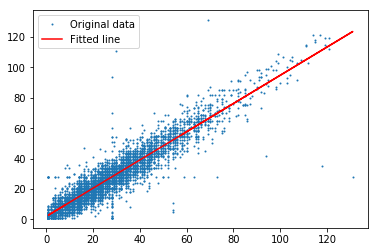

7.272951297186333


In [329]:
length = len(tf)*9//10
x=np.array(tf[:length])
y=np.array(tl[:length])
A = np.vstack([x, np.ones(len(x))]).T
w, b = np.linalg.lstsq(A, y)[0]
print(w,",", b)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=1)
plt.plot(x, w*x + b, 'r', label='Fitted line')
plt.legend()
plt.show()
print(validation(w,b))
create_test_submission(w,b)

In [308]:
from sklearn.metrics import mean_squared_error
mean_squared_error(tf,tl)

47.931668929625275

[12, 44, 56, 45, 34, 3, 56, 4, 33, 44, 56]